<a href="https://colab.research.google.com/github/NotoriousArnav/focoof/blob/main/Blur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
cap = cv2.VideoCapture('test.mp4')
frames = []
while True:
  ret, frame = cap.read()
  if frame is None:
    break
  frame = cv2.rotate(frame, cv2.ROTATE_90_COUNTERCLOCKWISE)
  frames.append(frame)

In [ ]:
img = frames[int(len(frames)/2)]
cv2_imshow(img)

In [ ]:
def overlay_(background, overlay, x, y):

    background_width = background.shape[1]
    background_height = background.shape[0]

    if x >= background_width or y >= background_height:
        return background

    h, w = overlay.shape[0], overlay.shape[1]

    if x + w > background_width:
        w = background_width - x
        overlay = overlay[:, :w]

    if y + h > background_height:
        h = background_height - y
        overlay = overlay[:h]

    if overlay.shape[2] < 4:
        overlay = np.concatenate(
            [
                overlay,
                np.ones((overlay.shape[0], overlay.shape[1], 1), dtype = overlay.dtype) * 255
            ],
            axis = 2,
        )

    overlay_image = overlay[..., :3]
    mask = overlay[..., 3:] / 255.0
    background[y:y+h, x:x+w] = (1.0 - mask) * background[y:y+h, x:x+w] + mask * overlay_image

    return background

In [ ]:
face_cascade = cv2.CascadeClassifier()
if not face_cascade.load(cv2.samples.findFile('./frontal_face.xml')):
    print('--(!)Error loading face cascade')
    exit(0)

def return_only_identified(cascade, frame, offset=(0,0)):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)

    #-- Detect faces
    faces = cascade.detectMultiScale(frame_gray)
    images = {}
    n = 0
    for (x,y,w,h) in faces:
        n = n + 1
        images[n]=[frame[y:y+h+offset[0], x:x+w+offset[1]], ((x,y),(w,h))]

    return images

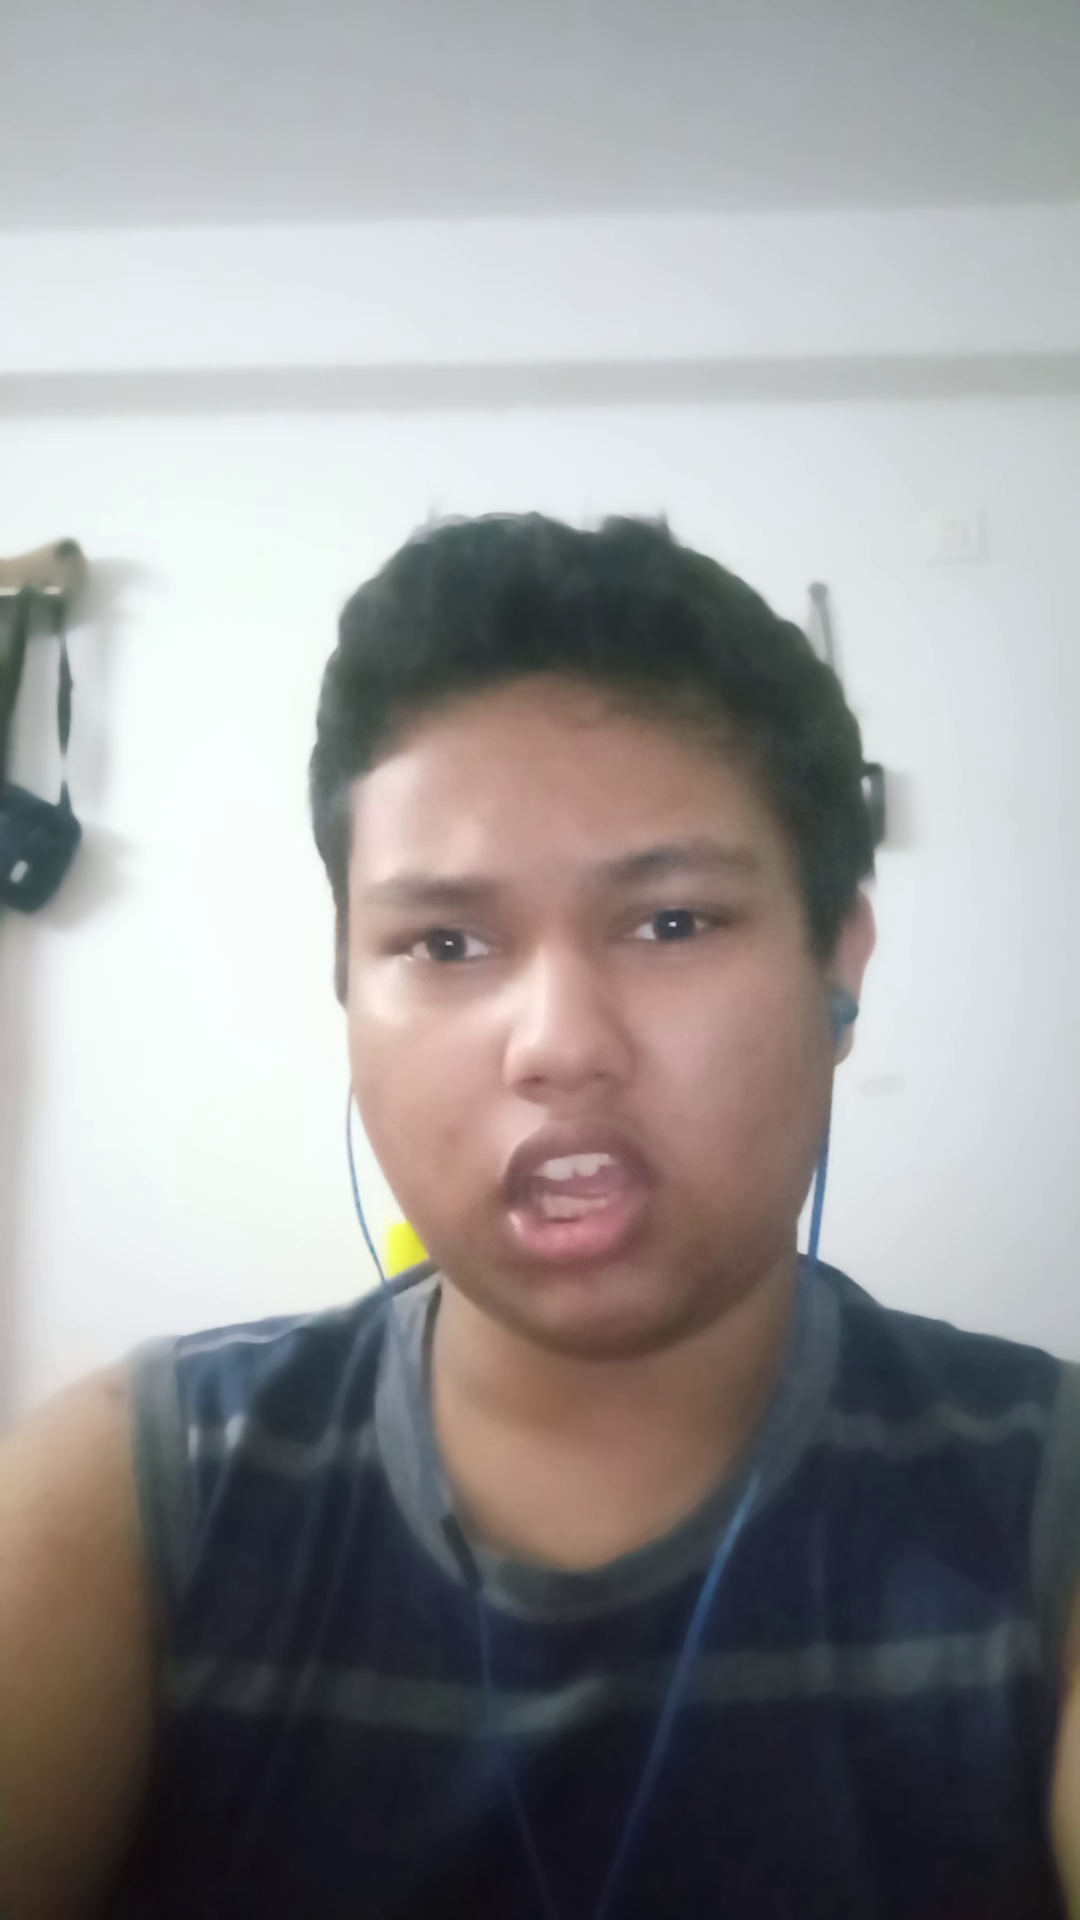

In [ ]:
faces=return_only_identified(face_cascade, img)
blurred_background = cv2.medianBlur(img, 9)
for face in faces.values():
  out = overlay_(blurred_background, face[0], face[1][0][0], face[1][0][1])
  cv2_imshow(out)